In [1]:
from traj2sim import *
import math

Persistence intervals:
[(1, (0.9298093479708587, 3.872983346207417)), (0, (0.0, inf)), (0, (0.0, 0.9298093479708585)), (0, (0.0, 0.9298093479708578)), (0, (0.0, 0.9298093479708577)), (0, (0.0, 0.9298093479708576)), (0, (0.0, 0.9298093479708575)), (0, (0.0, 0.9298093479708573)), (0, (0.0, 0.9298093479708573)), (0, (0.0, 0.9298093479708573)), (0, (0.0, 0.9298093479708573)), (0, (0.0, 0.9298093479708572)), (0, (0.0, 0.9298093479708571)), (0, (0.0, 0.9298093479708569)), (0, (0.0, 0.9298093479708568)), (0, (0.0, 0.9298093479708566))]


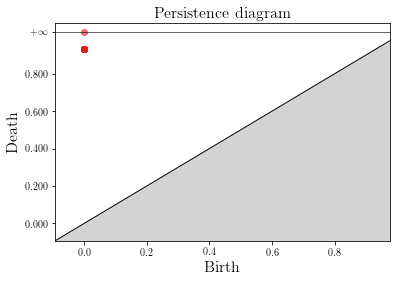

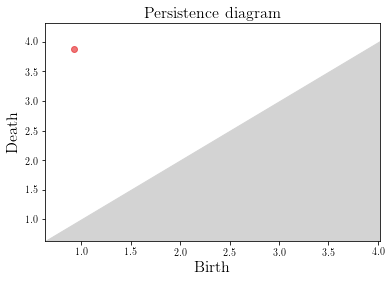

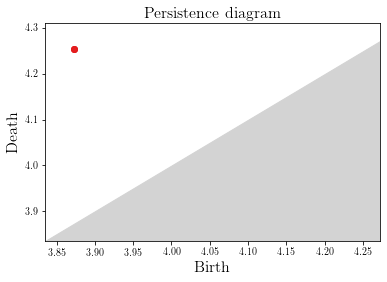

In [2]:
def sphere_point(theta, phi):
    return [math.cos(phi)*math.cos(theta), math.cos(phi)*math.sin(theta), math.sin(phi)]

def great_circle(theta, length = 10, noise=False, sigma=0.05):
    traj = np.zeros((length,3))
    for i in range(0, length):
        traj[i][:] = sphere_point(theta, i*math.pi/length) 
        if noise == True:
            traj[i] = np.add(traj[i],sigma*np.random.randn(1,3))
    return traj

t2s = Traj2Sim()

list_traj = []
N=15
for i in range(N):
    list_traj.append(great_circle(2*i*math.pi/N, noise=False))
t2s.set_trajectories(list_traj)
t2s.dist = 'dtw'
t2s.compute_dist()
t2s.compute_sim(verbose=False)


print('Persistence intervals:')
print(t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=0.5))
t2s.display_persistence()


Custom distance between 0, 0: nan
Custom distance between 0, 1: 2.3566014596374365
Custom distance between 0, 2: 4.2446493316922576
Custom distance between 0, 3: 6.3325588026030095
Custom distance between 0, 4: 7.584032916664159
Custom distance between 0, 5: 7.9283806711688865
Custom distance between 0, 6: 7.201742208428533
Custom distance between 0, 7: 6.052279675044345
Custom distance between 0, 8: 4.519209872894594
Custom distance between 0, 9: 2.576784872727368
Custom distance between 1, 0: 3.5089843317964164
Custom distance between 1, 1: nan
Custom distance between 1, 2: 2.9004047241951425
Custom distance between 1, 3: 5.767792844816052
Custom distance between 1, 4: 7.962991162841428
Custom distance between 1, 5: 9.370289984610691
Custom distance between 1, 6: 9.255948391172248
Custom distance between 1, 7: 8.804281705715391
Custom distance between 1, 8: 7.7417153328293
Custom distance between 1, 9: 7.617050255293915
Custom distance between 2, 0: 4.02399133113515
Custom distance b

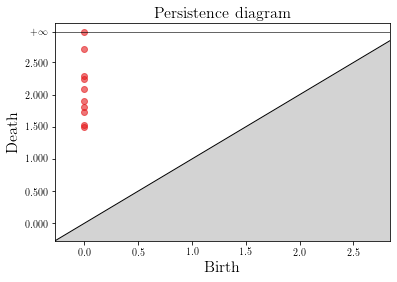

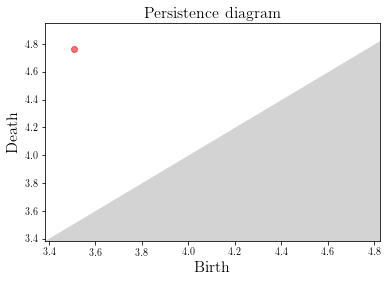

In [4]:

def great_circle_with_time(theta, length = 10, noise=False, sigma=0.05):
    traj = np.zeros((length,4))
    for i in range(0, length):
        traj[i][1:] = sphere_point(theta, i*math.pi/length)
        traj[i][0] = sphere_point(theta, i*math.pi/length)[2]
        if noise == True:
            traj[i] = np.add(traj[i],sigma*np.random.randn(1,4))
    return traj

t2s = Traj2Sim()

list_traj = []
N=10
for i in range(N):
    list_traj.append(great_circle_with_time(2*i*math.pi/N, noise=True))
t2s.set_trajectories(list_traj)
t2s.dist = 'custom'
t2s.compute_dist()
t2s.compute_sim(verbose=False)


print('Persistence intervals:')
print(t2s.simplex_tree.persistence(homology_coeff_field=2, min_persistence=0.5))
t2s.display_persistence()